# Inverse Nataf transformation

Author: Dimitris G. Giovanis,
Date: July 18, 2018

Description: Perform the inverse Nataf transformation on correlated samples defined through the UQpy Nataf class.

Import necessary modules

In [2]:
from UQpy.SampleMethods import MCS, Correlate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

Successful execution of MCS design..
Correlation matrix in the original space
[[ 1.   0.9]
 [ 0.9  1. ]]
UQpy: Performing correlation of the samples...
UQpy: Done.


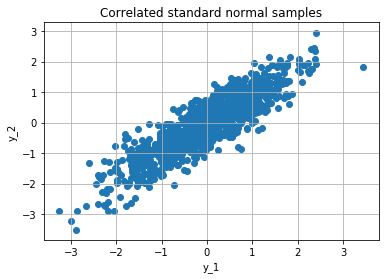

In [3]:
# Generate correlated non-Gaussian samples
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the original space')
print(Rho_G)

y = Correlate(samples=x, corr_norm=Rho_G)

plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
plt.grid(True)
plt.xlabel('y_1')
plt.ylabel('y_2')
plt.show()  

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Performing Nataf transformation of the samples...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.84945501]
 [ 0.84945501  1.        ]]


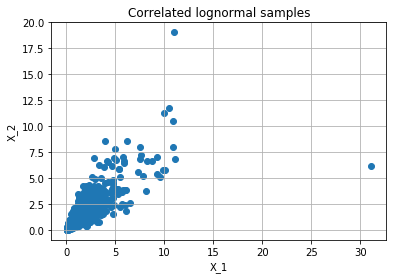

In [4]:
z = Nataf(samples=y, corr_norm=Rho_G, dist_name=['Lognormal', 'Lognormal'], dist_params=[[0, 1], [0, 1]])
print('Transformed Correlation matrix:')
print(z.corr)

plt.figure()
plt.title('Correlated lognormal samples')
plt.scatter(z.samples[:, 0], z.samples[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Perform the inverse nataf transformation

In [6]:
p = InvNataf(samples=z, dist_name=['Lognormal', 'Lognormal'], dist_params=[[0, 1], [0, 1]])
print('Correlation matrix in the standard normal space')
print(p.corr_norm)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.099777878708427997]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.054153368951335407]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.027264927967176313]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.014272830280363556]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0073230688005719372]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.0037965407475610575]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQp

Plot the standard normal samples from the inverse Nataf

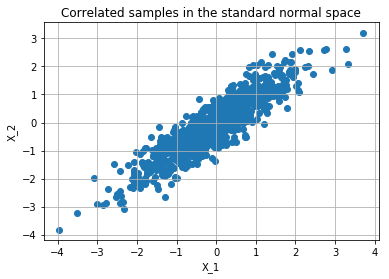

In [5]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(p.samples[:, 0], p.samples[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Plot the histogram of the samples in the standard normal space

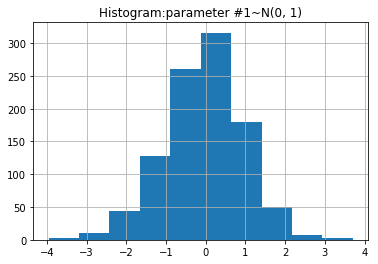

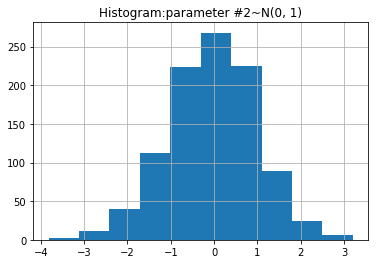

In [6]:
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(p.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(p.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()